Start by importing required modules/packages

In [1]:
# Import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data from csv file into pandas dataframe
bike_data = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv')

In [3]:
#Working with feaures
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


Separate the features and labels:

In [4]:
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

Split the data into test and train set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 511 rows
Test Set: 220 rows


Now we have the following four datasets:

- **X_train**: The feature values we'll use to train the model
- **y_train**: The corresponding labels we'll use to train the model
- **X_test**: The feature values we'll use to validate the model
- **y_test**: The corresponding labels we'll use to validate the model

Begin the model Training:

In [6]:
#Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

Generate a model and fit it into training set.

In [7]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

Work with test data to visualize predicted labels vs actual labels

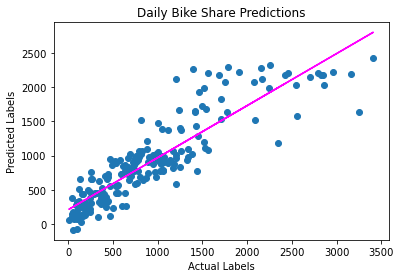

In [8]:
predictions_gb = model_gb.predict(X_test)

# Plot predicted vs actual
plt.scatter(y_test, predictions_gb)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions_gb, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Evaluate the model using evaluation metrics:

In [9]:
mse = mean_squared_error(y_test, predictions_gb)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_gb)
print("R2:", r2)

MSE: 103908.39979903326
RMSE: 322.34825856367405
R2: 0.7962941038636707


## Optimize Hyperparameters
GradientBoostingRegressor consists of large number of parameters that control the way the model is trained. In Machine Learning, the term *parameter* refers to values that can be determined from data whereas the values that we as a Data Scientist specify to control or change the behavior of training algorithm are referred as *hyperparameters*.

Learning about what are the hyperparameters in our model/algorithm, we can modify them in order to get more productive performance or reduce training time.

So how do we know what hyperparameter values you should use? Well, in the absence of a deep understanding of how the underlying algorithm works, we'll need to experiment. 

We can use combinations of hyperparameters to find the better result.

Let's try using a *grid search* approach to try combinations from a grid of possible values for the **learning_rate** and **n_estimators** hyperparameters of the **GradientBoostingRegressor** estimator.

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [11]:
# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

In [12]:
# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

In [13]:
# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)

gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)

gridsearch.fit(X_train, y_train)

print("Best parameter combination:", gridsearch.best_params_, "\n")

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 



In [14]:
#Get the best performing model
model_hpt = gridsearch.best_estimator_
print(model_hpt,"\n")

GradientBoostingRegressor(n_estimators=50) 



Visualize the test set labels with predicted labels for the best performing model:

In [15]:
predictions_hpt = model_hpt.predict(X_test)

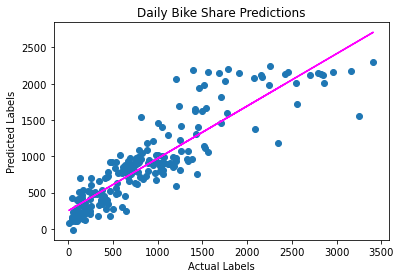

In [16]:
# Plot predicted vs actual
plt.scatter(y_test, predictions_hpt)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions_hpt, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Calculate the evaluation metrics:

In [17]:
# Evaluate the model using the test data
mse = mean_squared_error(y_test, predictions_hpt)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_hpt)
print("R2:", r2)

MSE: 108723.51832223826
RMSE: 329.73249509600697
R2: 0.7868543662133057


## Preprocess the Data

We trained a model with data that was loaded straight from a source file, with only moderately successful results.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations we can perform to get our data ready for modeling:


Here are some preprocessing methods we can use: 

### 1. Scaling numeric features

Normalizing numeric features so they're on the same scale prevents features with large values from producing coefficients that disproportionately affect the predictions. For example, suppose your data includes the following numeric features:

| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |
    
Normalizing these features to the same scale may result in the following values (assuming A contains values from 0 to 10, B contains values from 0 to 1000, and C contains values from 0 to 100):

|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|

There are multiple ways you can scale numeric data, such as calculating the minimum and maximum values for each column and assigning a proportional value between 0 and 1, or by using the mean and standard deviation of a normally distributed variable to maintain the same *spread* of values on a different scale.


### 2. Encoding categorical variables

Machine learning models work best with numeric features rather than text values, so we generally need to convert categorical features into numeric representations.  For example, suppose our data includes the following categorical feature. 

| Size |
| ---- |
|  S   |
|  M   |
|  L   |

We can apply *ordinal encoding* to substitute a unique integer value for each category, like this:

| Size |
| ---- |
|  0   |
|  1   |
|  2   |

Another common technique is to use *one hot encoding* to create individual binary (0 or 1) features for each possible category value. For example, we could use one-hot encoding to translate the possible categories into binary columns like this:

|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |

To apply these preprocessing transformations to the bike rental, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. We can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).


Let's start training the model:

In [18]:
#Import modules:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

In [19]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [20]:
# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [22]:
# Create preprocessing and training pipeline
pipeline_001 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


In [23]:
# fit the pipeline to train a linear regression model on the training set
model_001 = pipeline_001.fit(X_train, (y_train))
print (model_001)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


OK, the model is trained, including the preprocessing steps. Let's see how it performs with the validation data.

MSE: 105204.34827033458
RMSE: 324.3521978811529
R2: 0.7937534782241313


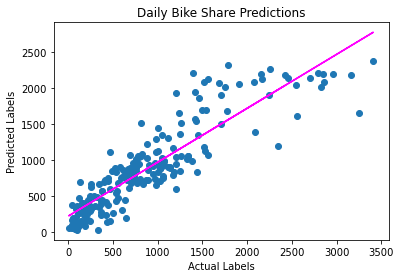

In [24]:
# Get predictions
predictions_001 = model_001.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions_001)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_001)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions_001)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions_001, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

The pipeline is composed of the transformations and the algorithm used to train the model. To try an alternative algorithm we can just change that step to a different kind of estimator.



In [25]:
from sklearn.ensemble import RandomForestRegressor
# Use a different estimator in the pipeline
pipeline_002 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


In [26]:
# fit the pipeline to train a linear regression model on the training set
model_002 = pipeline_002.fit(X_train, (y_train))
print (model_002, "\n")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 



In [27]:
# Get predictions
predictions_002 = model_002.predict(X_test)

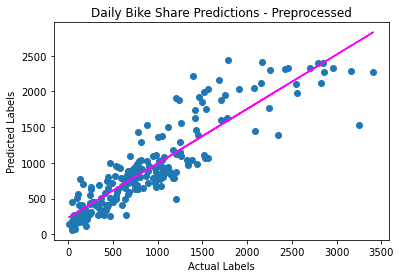

In [28]:
# Plot predicted vs actual
plt.scatter(y_test, predictions_002)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions_002, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [29]:
# Display metrics
mse = mean_squared_error(y_test, predictions_002)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_002)
print("R2:", r2)

MSE: 100037.54193363637
RMSE: 316.28711945578243
R2: 0.8038826777596415


We've now seen a number of common techniques used to train predictive models for regression. In a real project, we'll likely try a few more algorithms, hyperparameters, and preprocessing transformations; but this is the general idea. Let's explore how we can use the trained model with new data.

### Use the Trained Model

Start by saving the model.

In [30]:
import joblib

#Saving the model_001 as pickle file
filename_001 = './bike-share-001.pkl'
joblib.dump(model_001, filename_001)

['./bike-share-001.pkl']

In [31]:
#Saving the model_002 as pickle file
filename_002 = './bike-share-002.pkl'
joblib.dump(model_002, filename_002)

['./bike-share-002.pkl']

Now, we can load it whenever we need it, and use it to predict labels for new data. This is often called *scoring* or *inferencing*.

In [32]:
# Load the model_001 from the file
loaded_model_001 = joblib.load(filename_001)

In [33]:
# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new_001= np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new_001[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]


In [34]:
# Use the model to predict tomorrow's rentals
result = loaded_model_001.predict(X_new_001)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

Prediction: 122 rentals


In [35]:
#load the model_002 from the file
loaded_model_002 = joblib.load(filename_002)

In [36]:
# An array of features based on five-day weather forecast
X_new_002 = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

In [37]:
# Use the model to predict rentals
results = loaded_model_002.predict(X_new_002)
print('5 -Day rental predictions : ')

for prediction in results:
    print(np.round(prediction))

5 -Day rental predictions : 
548.0
824.0
238.0
191.0
273.0
